## Ingeniería de Prompts para la Generación de Música Sensorial: Un Enfoque Automático para la Percepción de Sabores

Desarrollar un método automático de ingeniería de prompts para optimizar la generación de piezas musicales que potencien la percepción gustativa mediante el modelo tasty-musicgen-small.

### Fase 1: Generación de Línea Base y Preparación de Datos (Semanas 1–3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Exploración del dataset SoundsXRatingsAllExps

In [2]:
main_path = "data/Guedes2023 (Taste&Affect)/Data.xlsx"
main_df = pd.read_excel(main_path)
main_df.head()

,sound,Sweet,Bitter,Sour,Salty,Unnamed: 5,Unnamed: 6,Unnamed: 7,sweet,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,bitter,Unnamed: 15,Unnamed: 16
0,1,0.464286,0.202381,0.107143,0.226190,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0
1,2,0.481013,0.303797,0.088608,0.126582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.369863,0.246575,0.136986,0.246575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.191011,0.505618,0.089888,0.213483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.411765,0.435294,0.058824,0.094118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sound        100 non-null    int64  
 1   Sweet        100 non-null    float64
 2   Bitter       100 non-null    float64
 3   Sour         100 non-null    float64
 4   Salty        100 non-null    float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   sweet        1 non-null      float64
 9   Unnamed: 9   1 non-null      float64
 10  Unnamed: 10  1 non-null      float64
 11  Unnamed: 11  1 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  1 non-null      float64
 14  bitter       1 non-null      float64
 15  Unnamed: 15  1 non-null      float64
 16  Unnamed: 16  1 non-null      float64
dtypes: float64(16), int64(1)
memory usage: 13.4 KB


#### Verificar datos nulos

In [4]:
print("\nValores nulos:")
print(main_df.isnull().sum())


Valores nulos:
sound            0
Sweet            0
Bitter           0
Sour             0
Salty            0
Unnamed: 5     100
Unnamed: 6     100
Unnamed: 7     100
sweet           99
Unnamed: 9      99
Unnamed: 10     99
Unnamed: 11     99
Unnamed: 12    100
Unnamed: 13     99
bitter          99
Unnamed: 15     99
Unnamed: 16     99
dtype: int64


#### Eliminar y renombrar columnas 

In [5]:
cols_to_keep = ["sound", "Sweet", "Bitter", "Sour", "Salty"]
main_df_cleaned = main_df[cols_to_keep].copy()

main_df_cleaned.columns = [col.lower() for col in main_df_cleaned.columns]

In [6]:
main_df_cleaned.head()

,sound,sweet,bitter,sour,salty
0,1,0.464286,0.202381,0.107143,0.226190
1,2,0.481013,0.303797,0.088608,0.126582
2,3,0.369863,0.246575,0.136986,0.246575
3,4,0.191011,0.505618,0.089888,0.213483
4,5,0.411765,0.435294,0.058824,0.094118


Verificar registros nulos del dataset:

In [7]:
print("\nValores nulos:")
print(main_df_cleaned.isnull().sum())


Valores nulos:
sound     0
sweet     0
bitter    0
sour      0
salty     0
dtype: int64


Verificar si hay datos duplicados:

In [8]:
duplicates = main_df_cleaned[main_df_cleaned.duplicated()]
print(f"Número de filas duplicadas: {duplicates.shape[0]}")

Número de filas duplicadas: 0


In [9]:
main_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sound   100 non-null    int64  
 1   sweet   100 non-null    float64
 2   bitter  100 non-null    float64
 3   sour    100 non-null    float64
 4   salty   100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


Verificar los valores únicos por columna:

In [10]:
print("\nCantidad de valores únicos por columna:")
print(main_df_cleaned.nunique())


Cantidad de valores únicos por columna:
sound     100
sweet      95
bitter     95
sour       90
salty      92
dtype: int64


In [11]:
for col in main_df_cleaned.columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(main_df_cleaned[col].unique())


Valores únicos en la columna 'sound':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Valores únicos en la columna 'sweet':
[0.46428571 0.48101266 0.36986301 0.19101124 0.41176471 0.09638554
 0.13888889 0.51282051 0.03614458 0.08045977 0.14285714 0.07228916
 0.14864865 0.27058824 0.30588235 0.38636364 0.20731707 0.49411765
 0.1978022  0.10344828 0.12676056 0.1875     0.35164835 0.21176471
 0.24390244 0.02739726 0.04123711 0.02564103 0.01315789 0.
 0.07042254 0.02247191 0.07894737 0.03370787 0.01149425 0.01190476
 0.03846154 0.025      0.01086957 0.04761905 0.07058824 0.03488372
 0.02409639 0.01111111 0.0375     0.69333333 0.7      

In [12]:
flavor_cols = ['sweet', 'bitter', 'salty', 'sour']

Análisis de outliers:

In [13]:
# Crear diccionario para guardar los outliers.
outliers = {}

# Detectar outliers para cada sabor.
for col in flavor_cols:
    Q1 = main_df_cleaned[col].quantile(0.25)
    Q3 = main_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers.
    outliers_df = main_df_cleaned[(main_df_cleaned[col] < lower_bound) | (main_df_cleaned[col] > upper_bound)]
    outliers[col] = outliers_df

    print(f"\nOutliers en '{col}': {outliers_df.shape[0]} valores encontrados.")
    if not outliers_df.empty:
        print(outliers_df)


Outliers en 'sweet': 0 valores encontrados.

Outliers en 'bitter': 0 valores encontrados.

Outliers en 'salty': 0 valores encontrados.

Outliers en 'sour': 2 valores encontrados.
    sound     sweet    bitter      sour     salty
32     33  0.078947  0.171053  0.578947  0.171053
41     42  0.010870  0.206522  0.597826  0.184783


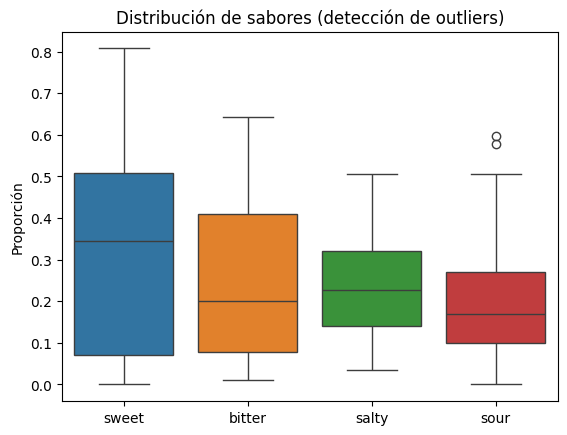

In [14]:
sns.boxplot(data=main_df_cleaned[flavor_cols])
plt.title("Distribución de sabores (detección de outliers)")
plt.ylabel("Proporción")
plt.show()

- sweet: La parte inferior (q1 a mediana) es más grende que la superior. Indica que la mayor concentración de los valores se encuentra en la parte alta de la distribución y los valores más bajos (25% de los datos) están más dispersos. Tambié, hay una gran variabilidad entre los valores más altos (bigote superior) podría indicar la presencia de algunos valores de outliers.

- bitter: La parte superior (mediana a q3) es más grende que la superior. Indica que la mayor concentración de los valores se encuentra en la parte baja (25%) de la distribución y los valores entre Q2 y Q3 están más dispersos, así como del último 25% (bigote superior).

- sour: tiene dos valores outliers.

### Estadísticas del dataset

Ver las estadísticas:

In [15]:
main_df_cleaned.describe()

,sound,sweet,bitter,sour,salty
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.325336,0.241634,0.201353,0.231677
std,29.011492,0.244142,0.176799,0.134121,0.107995
min,1.000000,0.000000,0.011628,0.000000,0.035294
25%,25.750000,0.071864,0.078469,0.099096,0.140653
50%,50.500000,0.344574,0.200028,0.170593,0.226429
75%,75.250000,0.507723,0.409793,0.270148,0.321098
max,100.000000,0.807692,0.643836,0.597826,0.505882


Histograma para visualizar cómo se distribuyen los valores de cada sabor:

- Eje X: Representa los rangos de valores (bins) del sabor correspondiente.

- Eje Y: Representa la cantidad de sonidos (frecuencia) que caen dentro de cada bin del eje X.

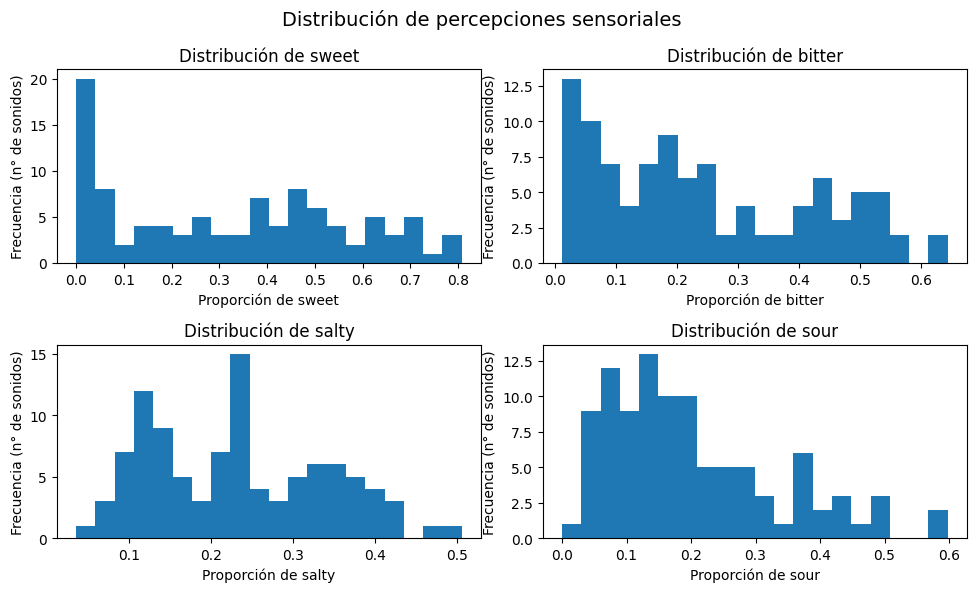

In [ ]:
# Crear los histogramas.
axes = main_df_cleaned[flavor_cols].hist(bins=20, figsize=(10, 6), grid=False)

# Recorrer los ejes para añadir etiquetas.
for ax, col in zip(axes.flatten(), flavor_cols):
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(f'Proporción de {col}')     # Eje X: valores del sabor.
    ax.set_ylabel('Frecuencia (n° de sonidos)')  # Eje Y: cantidad de registros.

plt.suptitle("Distribución de percepciones sensoriales", fontsize=14)
plt.tight_layout()
plt.show()

Correlación entre sabores:

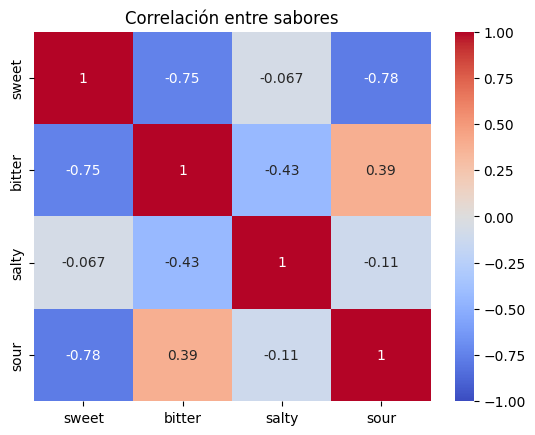

In [17]:
# Matriz de correlación.
corr = main_df_cleaned[flavor_cols].corr()

# Heatmap.
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre sabores")
plt.show()

Análisis de la correlación:

- r = 1: correlación positiva perfecta (ambos aumentan juntos).
- r = -1: correlación negativa perfecta (una aumenta y la otra disminuye).
- r = 0: no hay relación lineal.

Correlación positiva (los estímulos ácidos tienden a percibirse también como amargos):

- Sour(ácido) - Bitter(amargo) tienen correlación positiva (0.39), es decir, ambos aumentan juntos.

Correlaciones negativas fuertes (a mayor percepción de dulzura, menor percepción de acidez o amargor):

- Sweet(dulce) - Sour(ácido) tienen correlación de -0.78, significa que a más dulce, menos ácido (en promedio).

- Sweet(dulce) - Bitter(amargo) tienen correlación de -0.75, significa que a más dulce, menos amargo (en promedio).

Correlaciones negativas moderadas:

- Bitter(amargo) - Salty(salado) tienen correlación de -0.43, significa que a más amargo, menos salado (en promedio).

- Salty(salado) - Sour(ácido) tienen correlación de -0.11, significa que a más salado, menos ácido (en promedio).

- Sweet(dulce) - Salty(salado) tienen correlación de -0.067, significa que a más dulce, menos salado (en promedio).

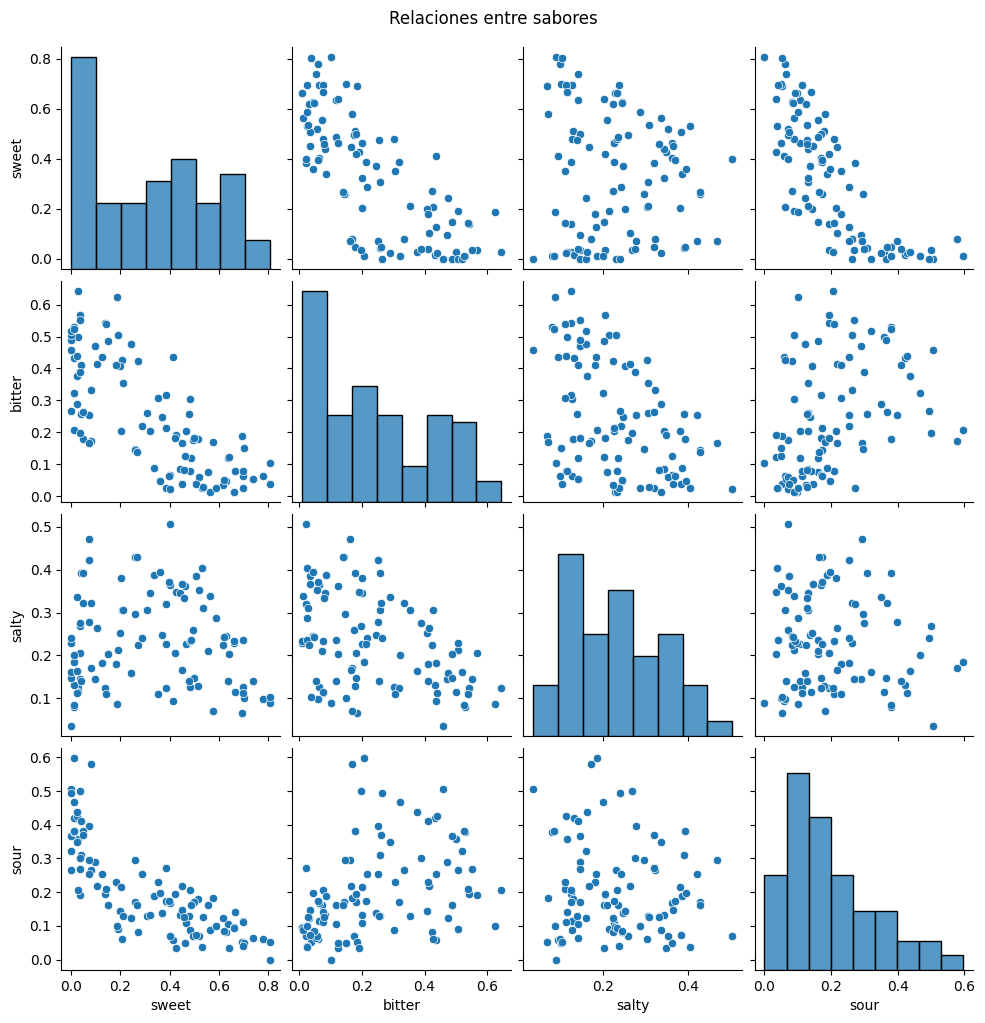

In [18]:
sns.pairplot(main_df_cleaned[flavor_cols])
plt.suptitle("Relaciones entre sabores", y=1.02)
plt.show()

Sabor dominante por sonido

In [19]:
# Crear nueva columna con el sabor dominante por fila.
main_df_cleaned['dominant_flavor'] = main_df_cleaned[flavor_cols].idxmax(axis=1)

# Ver cuántos sonidos son dominados por cada sabor.
print(main_df_cleaned['dominant_flavor'].value_counts())

dominant_flavor
sweet     49
bitter    29
salty     12
sour      10
Name: count, dtype: int64


In [20]:
main_df_cleaned

,sound,sweet,bitter,sour,salty,dominant_flavor
0,1,0.464286,0.202381,0.107143,0.226190,sweet
1,2,0.481013,0.303797,0.088608,0.126582,sweet
2,3,0.369863,0.246575,0.136986,0.246575,sweet
3,4,0.191011,0.505618,0.089888,0.213483,bitter
4,5,0.411765,0.435294,0.058824,0.094118,bitter
...,...,...,...,...,...,...
95,96,0.459770,0.080460,0.126437,0.333333,sweet
96,97,0.506024,0.036145,0.072289,0.385542,sweet
97,98,0.587500,0.025000,0.100000,0.287500,sweet
98,99,0.360465,0.046512,0.197674,0.395349,salty


/tmp/ipykernel_50050/3845079094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_df_cleaned, x='dominant_flavor', palette='Set2')


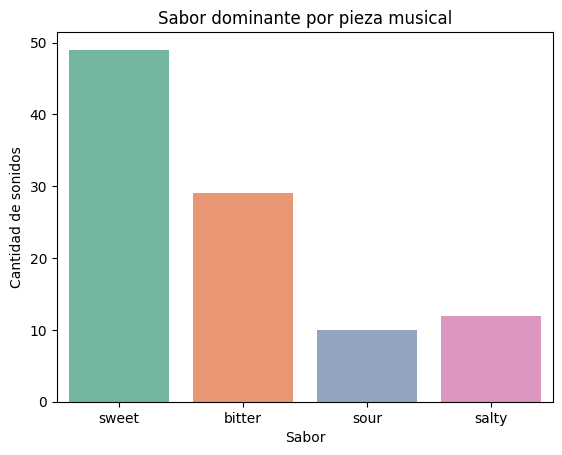

In [21]:
sns.countplot(data=main_df_cleaned, x='dominant_flavor', palette='Set2')
plt.title("Sabor dominante por pieza musical")
plt.ylabel("Cantidad de sonidos")
plt.xlabel("Sabor")
plt.show()

Casi la mitad de los estímulos son percibidos como principalmente dulces, lo que sugiere un sesgo en el diseño del dataset hacia este perfil gustativo.

Exportar los datos:

In [23]:
output_dir = "cleaned_data"
os.makedirs(output_dir, exist_ok=True)

main_df_cleaned.to_csv(os.path.join(output_dir, "guedes_cleaned.csv"), index=False)

print("Archivo guardado en:", os.path.join(output_dir, "guedes_cleaned.csv"))

Archivo guardado en: cleaned_data/guedes_cleaned.csv
